✅ Archive extraite.
✅ Dataset trouvé : /content/dataset/amhcd_64/AMHCD_64
✅ Images chargées : (25740, 32, 32, 3), Labels : 33 classes
✅ Split terminé : X_train=(20592, 32, 32, 3), X_val=(5148, 32, 32, 3)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 33)             │         2,805 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,961 (249.85 KB)

 Trainable params: 63,961 (249.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
322/322 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.3284 - loss: 2.4759 - val_accuracy: 0.8017 - val_loss: 0.7743
Epoch 2/18
322/322 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.8377 - loss: 0.6129 - val_accuracy: 0.8776 - val_loss: 0.4795
Epoch 3/18
322/322 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.8977 - loss: 0.3657 - val_accuracy: 0.9178 - val_loss: 0.3161
Epoch 4/18
322/322 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9269 - loss: 0.2645 - val_accuracy: 0.9207 - val_loss: 0.2786
Epoch 5/18
322/322 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.9385 - loss: 0.2127 - val_accuracy: 0.9479 - val_loss: 0.1904
Epoch 6/18
322/322 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.9510 - loss: 0.1741 - val_accuracy: 0.9476 - val_loss: 0.1910
Epoch 7/18
322/322 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9571 - loss: 0.1421 - val_accuracy: 0.9413 - val_loss: 0.1975
Epoch 8/18
322/322 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.9622 - loss: 0.1347 - 

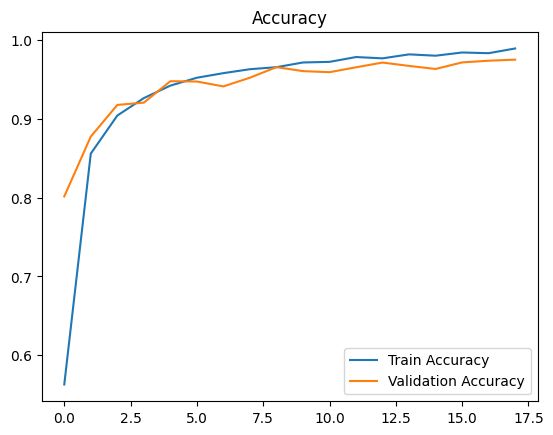

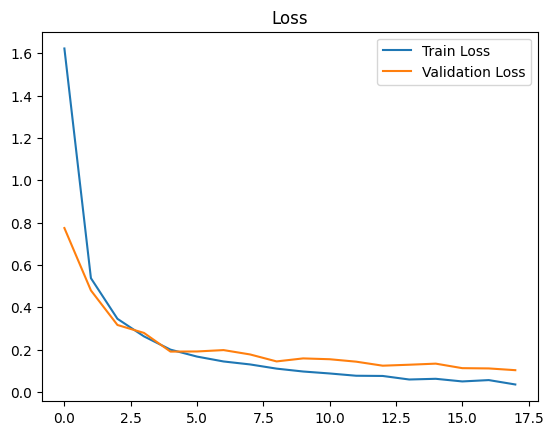

161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9738 - loss: 0.1286
🎯 Accuracy finale sur validation : 0.9753


In [8]:
# ==================== 1. Imports ====================
import os, zipfile
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# ==================== 2. Décompression ====================
zip_path = "/content/archive (1).zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Archive extraite.")

# ==================== 3. Localiser le dossier AMHCD_64 ====================
dataset_dir = None
for root, dirs, files in os.walk(extract_path):
    for d in dirs:
        if d.lower() == "amhcd_64":
            dataset_dir = os.path.join(root, d)
            break

assert dataset_dir is not None, "❌ Dossier 'AMHCD_64' non trouvé."
print("✅ Dataset trouvé :", dataset_dir)

# ==================== 4. Chargement des images RGB ====================
img_size = 32
X, y = [], []

# ⚠️ Filtrage des vrais dossiers de classes
classes = sorted([
    d for d in os.listdir(dataset_dir)
    if os.path.isdir(os.path.join(dataset_dir, d)) and
       len(os.listdir(os.path.join(dataset_dir, d))) > 0
])

for label, class_name in enumerate(classes):
    class_path = os.path.join(dataset_dir, class_name)
    for img_name in os.listdir(class_path):
        if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path).convert('RGB').resize((img_size, img_size))
            X.append(np.asarray(img, dtype=np.float32) / 255.0)
            y.append(label)

X = np.array(X)
y = np.array(y).reshape(-1, 1)

print(f"✅ Images chargées : {X.shape}, Labels : {len(classes)} classes")

# ==================== 5. Encodage One-hot ====================
ohe = OneHotEncoder(sparse_output=False)
y_encoded = ohe.fit_transform(y)

# ==================== 6. Train/Validation split ====================
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print(f"✅ Split terminé : X_train={X_train.shape}, X_val={X_val.shape}")

# ==================== 7. Définir LeNet-5 ====================
def build_lenet5(input_shape=(32, 32, 3), num_classes=33):
    model = models.Sequential([

        tf.keras.Input(shape=input_shape),
        layers.Conv2D(6, kernel_size=(5, 5), activation='relu'),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_lenet5(num_classes=len(classes))
model.summary()

# ==================== 8. Compilation & Entraînement ====================
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=18, batch_size=64)

# ==================== 9. Courbes d'entraînement ====================
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

# ==================== 10. Évaluation ====================
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"🎯 Accuracy finale sur validation : {val_acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


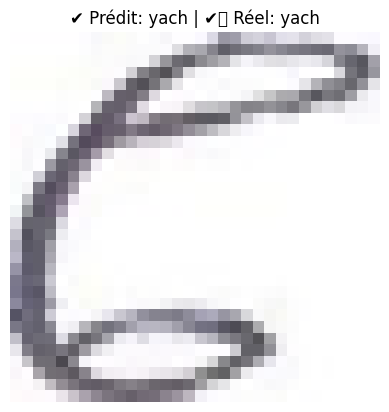

In [20]:
import matplotlib.pyplot as plt

# Sélection d'une image de validation
index = 5
sample = X_val[index:index+1]  # batch de 1 image
true_label_index = np.argmax(y_val[index])
true_label_name = classes[true_label_index]

# Prédiction
pred_probs = model.predict(sample)
pred_label_index = np.argmax(pred_probs)
pred_label_name = classes[pred_label_index]

# Affichage
plt.imshow(sample[0])
plt.title(f"✔️ Prédit: {pred_label_name} | ✔️ Réel: {true_label_name}")
plt.axis('off')
plt.show()
